# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [1172]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [1173]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [1175]:
spaceship.shape

(8693, 14)

**Check for data types**

In [1177]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [1179]:
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [1181]:
spaceship.dropna(how='any', axis=0, inplace=True) 

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [1183]:
spaceship['Cabin'].value_counts()

Cabin
B/11/S      7
E/13/S      7
C/137/S     7
G/734/S     7
G/1476/S    7
           ..
F/1/P       1
A/98/P      1
G/1499/S    1
G/1500/S    1
F/3/S       1
Name: count, Length: 5305, dtype: int64

In [1184]:
spaceship['Cabin'] = spaceship['Cabin'].apply(lambda x: x.split('/')[0])

In [1185]:
spaceship['Cabin'].value_counts()

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64

- Drop PassengerId and Name

In [1187]:
spaceship.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [1188]:
spaceship.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


- For non-numerical columns, do dummies.

In [1190]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [1191]:
print(spaceship['HomePlanet'].value_counts())
enc.fit(spaceship['HomePlanet'])
spaceship['HomePlanet'] = enc.transform(spaceship['HomePlanet'])
print(spaceship['HomePlanet'].value_counts())

HomePlanet
Earth     3566
Europa    1673
Mars      1367
Name: count, dtype: int64
HomePlanet
0    3566
1    1673
2    1367
Name: count, dtype: int64


In [1192]:
print(spaceship['CryoSleep'].value_counts())
enc.fit(spaceship['CryoSleep'])
spaceship['CryoSleep'] = enc.transform(spaceship['CryoSleep'])
print(spaceship['CryoSleep'].value_counts())

CryoSleep
False    4274
True     2332
Name: count, dtype: int64
CryoSleep
0    4274
1    2332
Name: count, dtype: int64


In [1193]:
print(spaceship['Cabin'].value_counts())
enc.fit(spaceship['Cabin'])
spaceship['Cabin'] = enc.transform(spaceship['Cabin'])
print(spaceship['Cabin'].value_counts())

Cabin
F    2152
G    1973
E     683
B     628
C     587
D     374
A     207
T       2
Name: count, dtype: int64
Cabin
5    2152
6    1973
4     683
1     628
2     587
3     374
0     207
7       2
Name: count, dtype: int64


In [1194]:
print(spaceship['Destination'].value_counts())
enc.fit(spaceship['Destination'])
spaceship['Destination'] = enc.transform(spaceship['Destination'])
print(spaceship['Destination'].value_counts())

Destination
TRAPPIST-1e      4576
55 Cancri e      1407
PSO J318.5-22     623
Name: count, dtype: int64
Destination
2    4576
0    1407
1     623
Name: count, dtype: int64


In [1195]:
print(spaceship['VIP'].value_counts())
enc.fit(spaceship['VIP'])
spaceship['VIP'] = enc.transform(spaceship['VIP'])
print(spaceship['VIP'].value_counts())

VIP
False    6444
True      162
Name: count, dtype: int64
VIP
0    6444
1     162
Name: count, dtype: int64


**Perform Train Test Split**

In [1197]:
features = spaceship.drop(columns = ["Transported"])
target = spaceship["Transported"].astype(int)

In [1198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [1201]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [1202]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

- Evaluate your model's performance. Comment it

In [1204]:
knn.score(X_test, y_test)

0.7549167927382754

**Normalization**

In [1206]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [1207]:
normalizer = MinMaxScaler()

In [1208]:
normalizer.fit(X_train)

MinMaxScaler()

In [1209]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [1210]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,0.571429,1.0,0.405063,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.0,0.857143,1.0,0.050633,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.714286,1.0,0.379747,0.0,0.00000,0.007916,0.000000,0.051276,0.000000
3,1.0,0.0,0.571429,1.0,0.215190,0.0,0.00131,0.000000,0.046111,0.016378,0.000049
4,0.0,1.0,0.857143,1.0,0.329114,0.0,0.00000,0.000000,0.000000,0.000000,0.000000


In [1211]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1.0,1.0,0.714286,0.0,0.632911,0.0,0.0,0.000000,0.0,0.00000,0.0
1,0.0,1.0,0.857143,0.5,0.227848,0.0,0.0,0.000000,0.0,0.00000,0.0
2,0.0,1.0,0.857143,0.0,0.189873,0.0,0.0,0.000000,0.0,0.00000,0.0
3,0.0,1.0,0.857143,0.5,0.658228,0.0,0.0,0.000000,0.0,0.00000,0.0
4,0.5,0.0,0.142857,1.0,0.784810,1.0,0.0,0.054775,0.0,0.07774,0.0


In [1212]:
knn.fit(X_train_norm, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1213]:
knn.score(X_test_norm, y_test)

0.7549167927382754

## Feature Selection

In [1215]:
import matplotlib.pyplot as plt
import seaborn as sns

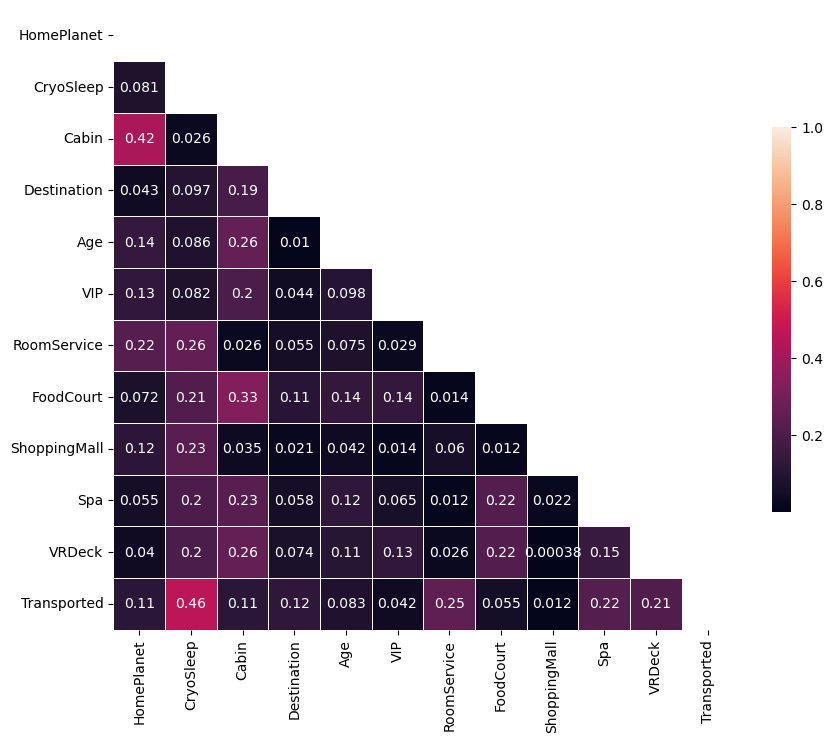

In [1216]:
corr=np.abs(spaceship.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [1217]:
X_train_reduced = X_train_norm.drop(columns = ["Age", "Destination"])
X_test_reduced = X_test_norm.drop(columns = ["Age", "Destination"])

In [1218]:
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.7866868381240545

In [1219]:
X_train_reduced = X_train_norm.drop(columns = ["Age", "VIP", "FoodCourt", "ShoppingMall"])
X_test_reduced = X_test_norm.drop(columns = ["Age", "VIP", "FoodCourt", "ShoppingMall"])

In [1220]:
knn.fit(X_train_reduced, y_train)

knn.score(X_test_reduced, y_test)

0.7745839636913767

### Logistic Regression

In [1222]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg.score( X_test, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7806354009077155

In [1223]:
log_reg.fit(X_train_reduced, y_train)

log_reg.score( X_test_reduced, y_test)

0.7443267776096822

### Decision Tree

In [1225]:
from sklearn.tree import DecisionTreeClassifier

In [1226]:
dt = DecisionTreeClassifier(max_depth = 10)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [1227]:
dt.score(X_test, y_test)

0.7753403933434191

In [1228]:
dt.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=10)

In [1229]:
dt.score(X_test_reduced, y_test)

0.7617246596066566

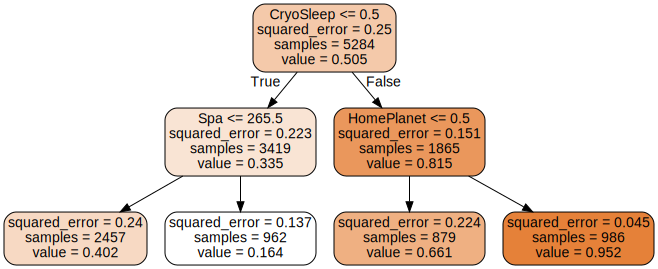

In [1230]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)


dot_data = export_graphviz(tree, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Bagging and Pasting

In [1276]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier

In [1278]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [1280]:
bagging_class = BaggingClassifier(DecisionTreeClassifier(max_depth=20),
                               n_estimators=100,
                               max_samples = 1000)

In [1282]:
bagging_class.fit(X_train_norm, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [1284]:
pred = bagging_class.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_class.score(X_test_norm, y_test))

MAE 0.20953101361573373
RMSE 0.4577455773852258
R2 score 0.7904689863842662


In [1308]:
bagging_class.fit(X_train_reduced, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [1310]:
pred = bagging_class.predict(X_test_reduced)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_class.score(X_test_reduced, y_test))

MAE 0.22087745839636913
RMSE 0.46997601895880725
R2 score 0.7791225416036308


In [1304]:
bagging_class.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                  max_samples=1000, n_estimators=100)

In [1306]:
pred = bagging_class.predict(X_test)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_class.score(X_test, y_test))

MAE 0.21860816944024206
RMSE 0.46755552551567825
R2 score 0.7813918305597579


### Random Patches

In [1286]:
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=20)

In [1288]:
forest.fit(X_train_norm, y_train)

RandomForestClassifier(max_depth=20)

In [1290]:
pred = forest.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_norm, y_test))

MAE 0.21482602118003025
RMSE 0.4634932806201512
R2 score 0.7851739788199698


### AdaBoost

In [1292]:
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [1294]:
ada_class.fit(X_train_norm, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [1295]:
pred = ada_class.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_class.score(X_test_norm, y_test))

MAE 0.23827534039334342
RMSE 0.4881345515258507
R2 score 0.7617246596066566


### Gradient Boosting

In [1298]:
gb_class = GradientBoostingClassifier(max_depth=20,
                                   n_estimators=100)

In [1300]:
gb_class.fit(X_train_norm, y_train)

GradientBoostingClassifier(max_depth=20)

In [1301]:
pred = gb_class.predict(X_test_norm)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_class.score(X_test_norm, y_test))

MAE 0.21558245083207261
RMSE 0.46430857286084287
R2 score 0.7844175491679274
